In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

%matplotlib inline

data = pd.read_csv("traffic-collision-data-from-2010-to-present.csv")
data.columns = data.columns.str.replace(' ', '_')

# Extract Longitude and Latitude Coordinates
location = data['Location']

def long_to_float(latlong):
    return float(latlong[latlong.index(' ') + 2: latlong.index(',') - 1])

def lat_to_float(latlong):
    return float(latlong[latlong.index('latitude') + 12: len(latlong) - 2])
                   
# Extracted Coordinates 492963 when unfiltered. Input into dataframe
data['Longitude'] = location.apply(long_to_float, 'Location')
data['Latitude'] = location.apply(lat_to_float, 'Location')
data


DR_Number            Date_Reported            Date_Occurred  \
0       190717238  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
1       191917172  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
2       191223588  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
3       191614639  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
4       190917503  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
5       190123999  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
6       191319523  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
7       191518109  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
8       190219150  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
9       190415118  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
10      191223600  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
11      190816220  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
12      190717242  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
13      190219155  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
14      191015659  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
15      191715865  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
16      191117289  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
17      190717241  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
18      190516087  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
19      190321652  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
20      190124003  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
21      190124000  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
22      191715863  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
23      191319475  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
24      190415046  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
25      191015658  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
26      191015621  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
27      190123976  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
28      191917165  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
29      190717234  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
...           ...                      ...                      ...   
492933  100804013  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492934  101304063  2010-01-02T00:00:00.000  2010-01-01T00:00:00.000   
492935  100604025  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492936  100104025  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492937  101804056  2010-01-02T00:00:00.000  2010-01-01T00:00:00.000   
492938  100404028  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492939  101804024  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492940  101204042  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492941  101904004  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492942  101504010  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492943  101804043  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492944  110626546  2011-11-07T00:00:00.000  2010-01-01T00:00:00.000   
492945  100304060  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492946  100904018  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492947  100504080  2010-01-03T00:00:00.000  2010-01-01T00:00:00.000   
492948  100604023  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492949  101304041  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492950  101204022  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492951  101704018  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492952  100104051  2010-01-02T00:00:00.000  2010-01-01T00:00:00.000   
492953  101204034  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492954  100604024  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492955  101504041  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492956  100104017  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492957  101204063  2010-01-02T00

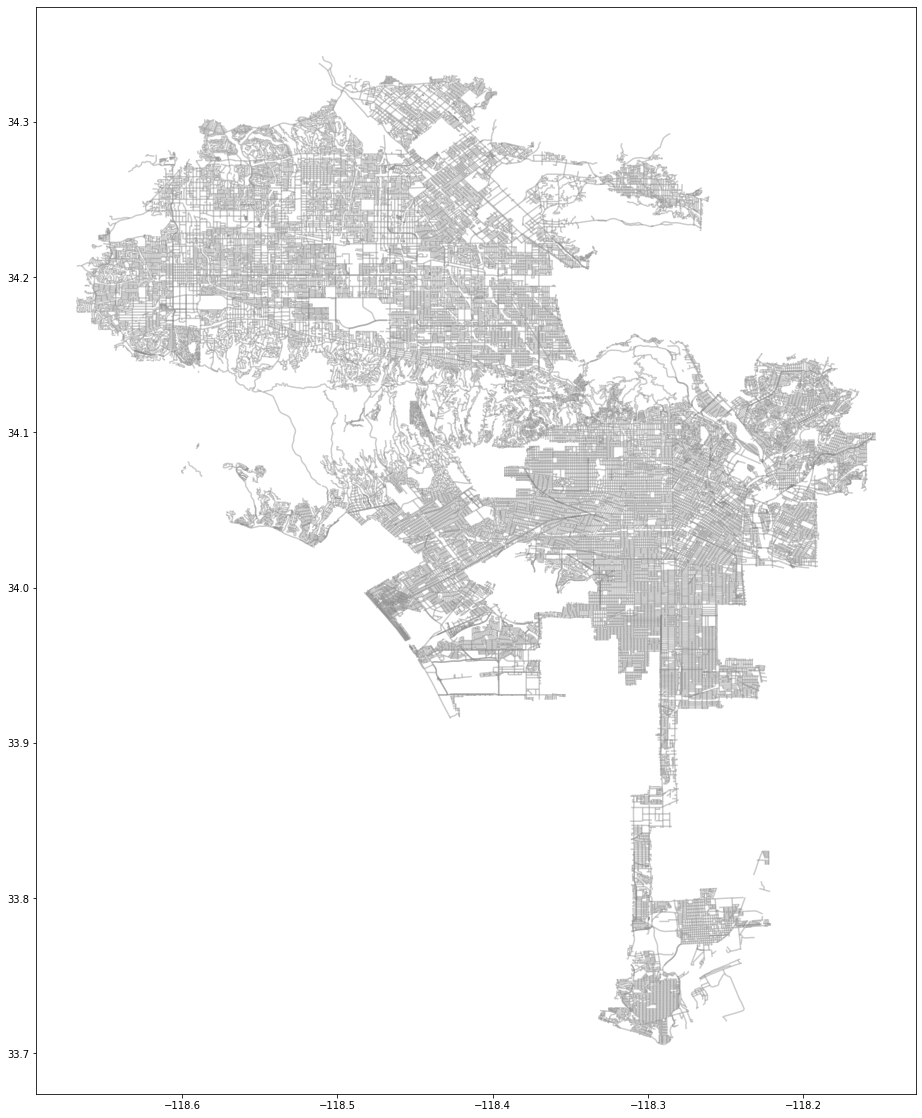

In [51]:
#Visualize LA County map with streetlines
street_map = gpd.read_file('Streets_Centerline/Streets_Centerline.shp')
fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')


In [139]:
#Filter data to include crashes near the county lines
filt_coordinates = data[data['Longitude']  < -118.1]
filt_coordinates = filt_coordinates[filt_coordinates['Latitude'].between(33.4, 34.4)]

#Create Points out of longitude and latitude
geometry = [Point(xy) for xy in zip(filt_coordinates['Longitude'], filt_coordinates['Latitude'])]
crs = {'init': 'epsg:4326'}
#Generate GeoDataFrame
geo_df = gpd.GeoDataFrame(filt_coordinates, #Specify data
                          crs = crs, #Specify Coordinate Reference System
                          geometry = geometry #Specify the geometry list we created
                         )
geo_df

DR_Number            Date_Reported            Date_Occurred  \
0       190717238  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
1       191917172  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
2       191223588  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
3       191614639  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
4       190917503  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
5       190123999  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
6       191319523  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
7       191518109  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
8       190219150  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
9       190415118  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
10      191223600  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
11      190816220  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
12      190717242  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
13      190219155  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
14      191015659  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
15      191715865  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
16      191117289  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
17      190717241  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
18      190516087  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
19      190321652  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
20      190124003  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
21      190124000  2019-09-28T00:00:00.000  2019-09-28T00:00:00.000   
22      191715863  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
23      191319475  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
24      190415046  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
25      191015658  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
26      191015621  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
27      190123976  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
28      191917165  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
29      190717234  2019-09-27T00:00:00.000  2019-09-27T00:00:00.000   
...           ...                      ...                      ...   
492933  100804013  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492934  101304063  2010-01-02T00:00:00.000  2010-01-01T00:00:00.000   
492935  100604025  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492936  100104025  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492937  101804056  2010-01-02T00:00:00.000  2010-01-01T00:00:00.000   
492938  100404028  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492939  101804024  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492940  101204042  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492941  101904004  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492942  101504010  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492943  101804043  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492944  110626546  2011-11-07T00:00:00.000  2010-01-01T00:00:00.000   
492945  100304060  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492946  100904018  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492947  100504080  2010-01-03T00:00:00.000  2010-01-01T00:00:00.000   
492948  100604023  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492949  101304041  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492950  101204022  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492951  101704018  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492952  100104051  2010-01-02T00:00:00.000  2010-01-01T00:00:00.000   
492953  101204034  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492954  100604024  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492955  101504041  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492956  100104017  2010-01-01T00:00:00.000  2010-01-01T00:00:00.000   
492957  101204063  2010-01-02T00

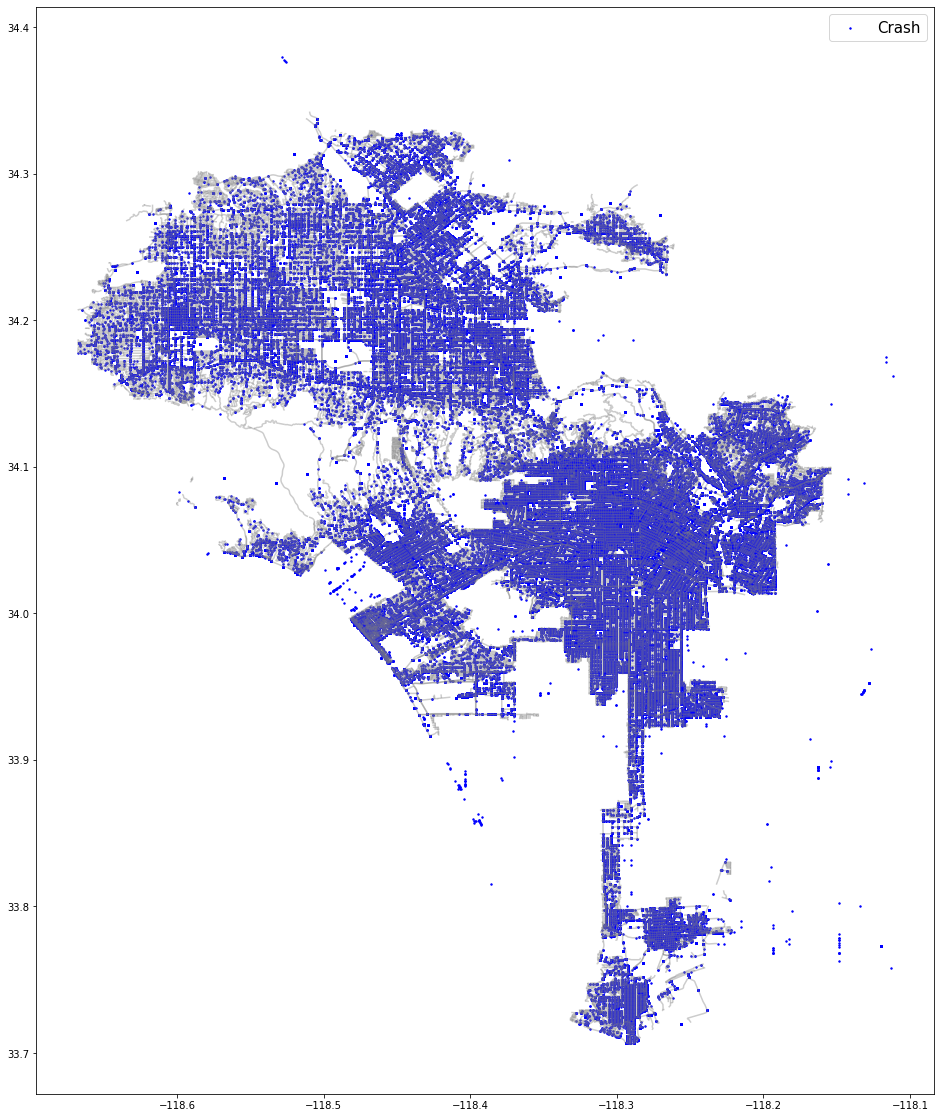

In [53]:
#Print out map with points plotted
fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 2, color = 'blue', marker = 'o', label = 'Crash')
pt.legend(prop = {'size': 15})

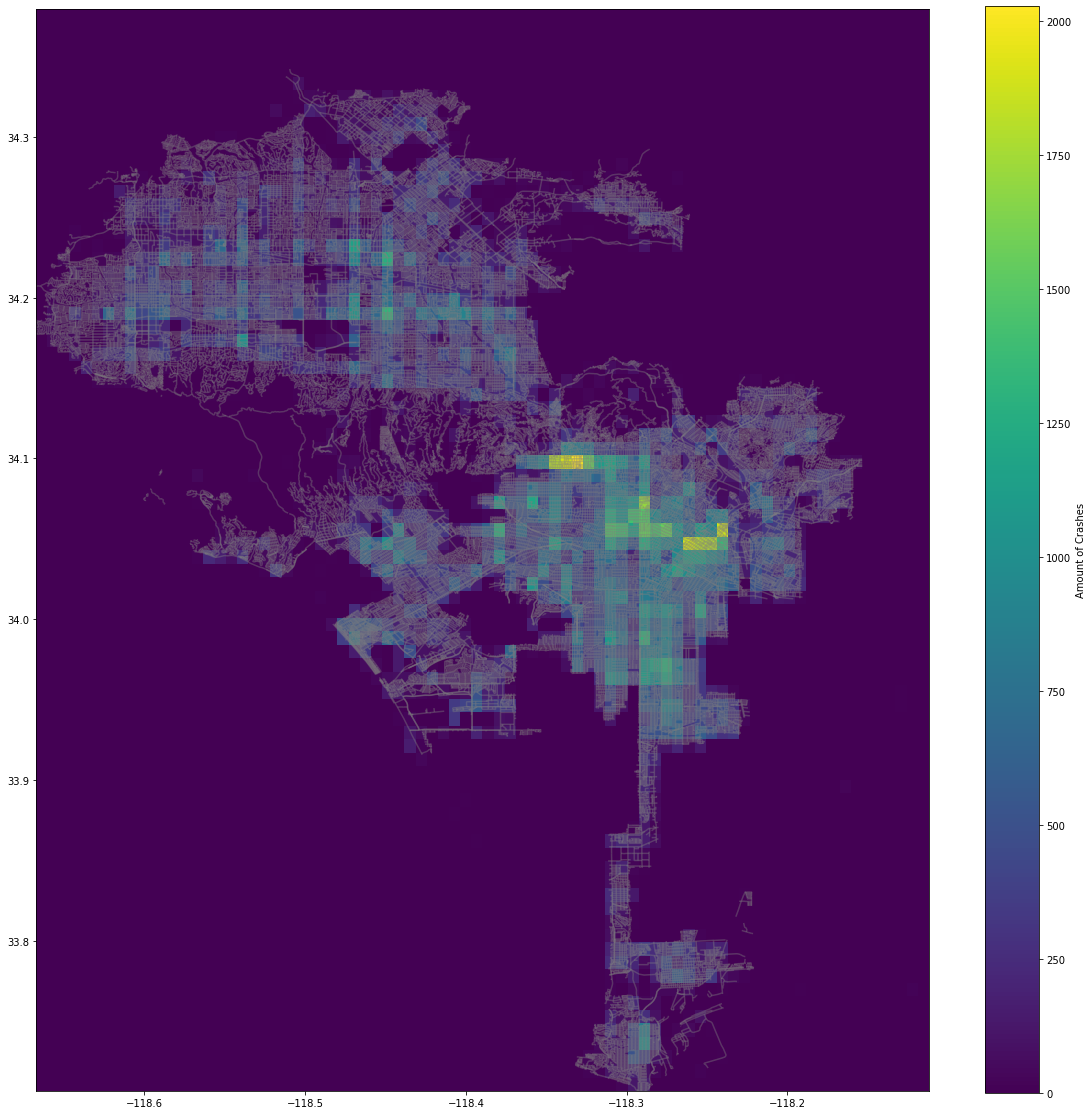

In [54]:
# Matplotlib square heatmap of crashes overlaying city map

fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

heatmap, xedges, yedges = np.histogram2d(filt_coordinates['Longitude'], filt_coordinates['Latitude'], bins=80)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

pt.imshow(heatmap.T, extent=extent, origin='lower', alpha = 1)
cb = pt.colorbar()
cb.set_label('Amount of Crashes')
pt.show()

/Users/shonepatil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':


High frequency location: 34.096247368421054, -118.32844499987779
High frequency location: 34.060815789473686, -118.30066999982223
High frequency location: 34.102152631578946, -118.33677749989445
High frequency location: 34.102152631578946, -118.33122249988334
High frequency location: 34.06672105263158, -118.29233749980557
High frequency location: 34.043099999999995, -118.2478974997167
High frequency location: 34.05491052631579, -118.24234249970559


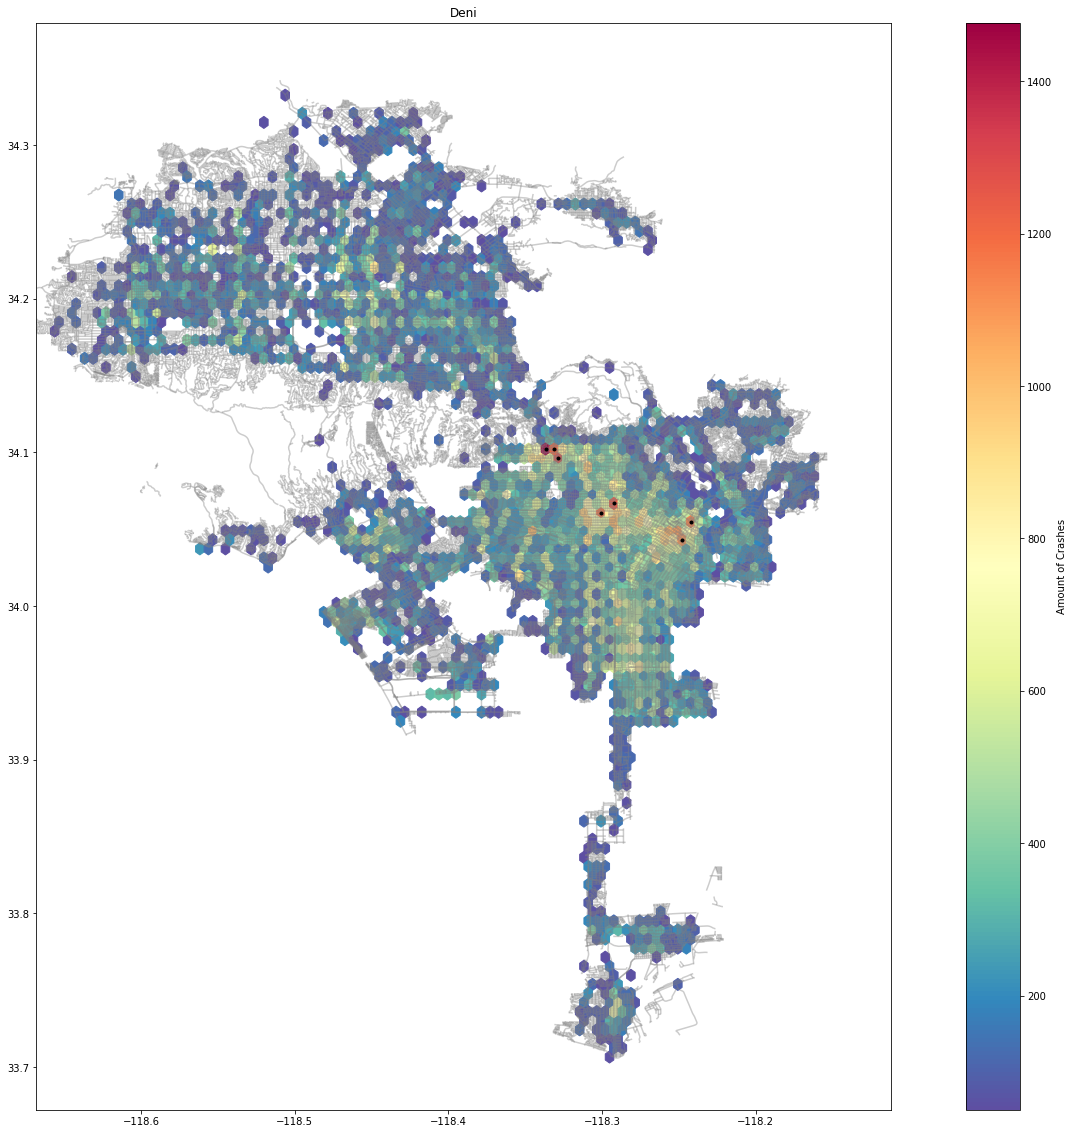

In [116]:
# Matplotlib hexagonal heatmap of crashes overlaying city map

fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

pt.hexbin(filt_coordinates['Longitude'], filt_coordinates['Latitude'], C=None, gridsize = 100,mincnt = 50, cmap = pt.cm.Spectral_r)#hexbinning all crashes
cb = pt.colorbar()
image = pt.hexbin(filt_coordinates['Longitude'], filt_coordinates['Latitude'], C=None, gridsize = 100,mincnt = 1100, alpha = 0)#hexbinning most crashes

#Plot dots on high density crash locations( >= 1100 crashes)
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        pt.plot(binx,biny,'k.',zorder=100)
        print("High frequency location: " + str(biny) + ", " +str(binx))#print locations of high density

pt.axis('image')#necessary for correct aspect ratio
pt.title('Deni')
cb.set_label('Amount of Crashes')
pt.show()   

Looking at the most concentrated crash locations, we see that a majority of crashes from the last 10 years are near 
Hollywood Boulevard between streets Highland Avenue and North Cahuenga Boulevard.


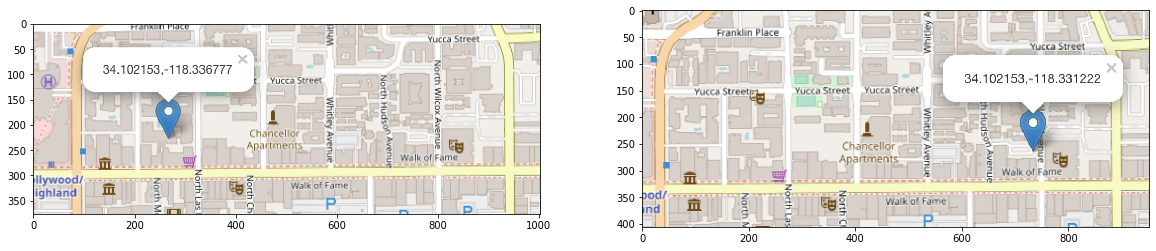

In [56]:
import matplotlib.image as mpimg

print("Looking at the most concentrated crash locations, "
      "we see that a majority of crashes from the last 10 years are near \nHollywood Boulevard "
      "between streets Highland Avenue and North Cahuenga Boulevard.")

img1 = mpimg.imread('Locations/first_area.png')
img2 = mpimg.imread('Locations/second_area.png')
f, axarr = pt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(img1)
axarr[1].imshow(img2)
pt.show()

/Users/shonepatil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


High frequency location: 34.1008596491228, -118.33040299987401


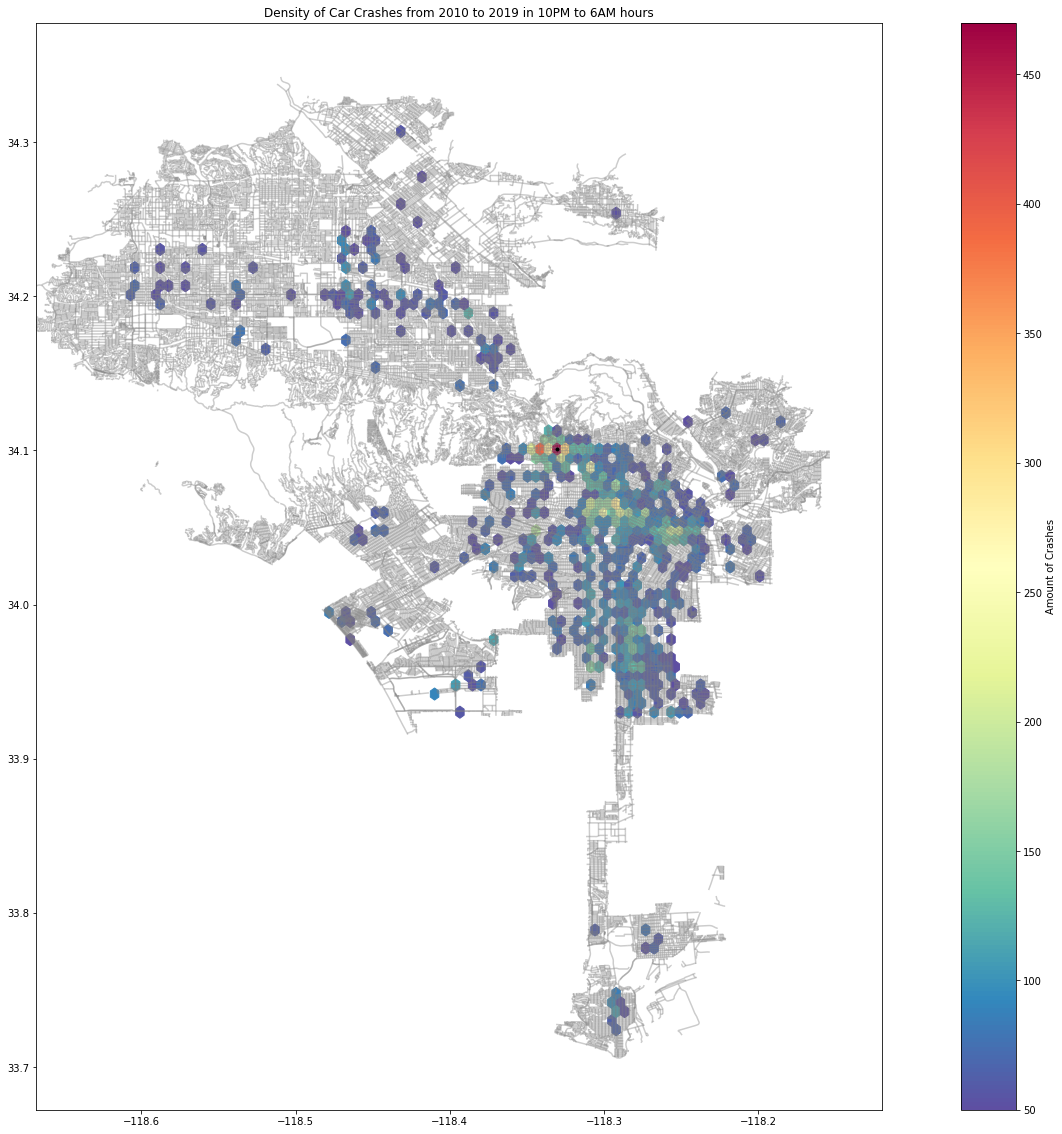

In [117]:
# 10PM to 6AM Crashes from 2010 to 2019
nine_to_five = filt_coordinates[(filt_coordinates['Time_Occurred'] < 600) | (filt_coordinates['Time_Occurred'] > 2200)]

# Matplotlib hexagonal heatmap of crashes overlaying city map

fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

pt.hexbin(nine_to_five['Longitude'], nine_to_five['Latitude'], C=None, gridsize = 100,mincnt = 50, cmap = pt.cm.Spectral_r)#hexbinning all crashes
cb = pt.colorbar()
image = pt.hexbin(nine_to_five['Longitude'], nine_to_five['Latitude'], C=None, gridsize = 100,mincnt = 400, alpha = 0)#hexbinning most crashes

#Plot dots on high density crash locations( >= 400 crashes)
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        pt.plot(binx,biny,'k.',zorder=100)
        print("High frequency location: " + str(biny) + ", " +str(binx))#print locations of high density

pt.axis('image')#necessary for correct aspect ratio
pt.title('Density of Car Crashes from 2010 to 2019 in 10PM to 6AM hours')
cb.set_label('Amount of Crashes')
pt.show()   

/Users/shonepatil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in power


High frequency location: 34.060689473684214, -118.2934509997648
High frequency location: 34.04962105263158, -118.25765999969322
High frequency location: 34.09942894736842, -118.34202449986195
High frequency location: 34.09942894736842, -118.33691149985172
High frequency location: 34.09942894736842, -118.3317984998415
High frequency location: 34.09942894736842, -118.32668549983127
High frequency location: 34.06622368421053, -118.29089449975969
High frequency location: 34.03301842105263, -118.26532949970856
High frequency location: 34.044086842105266, -118.24999049967788


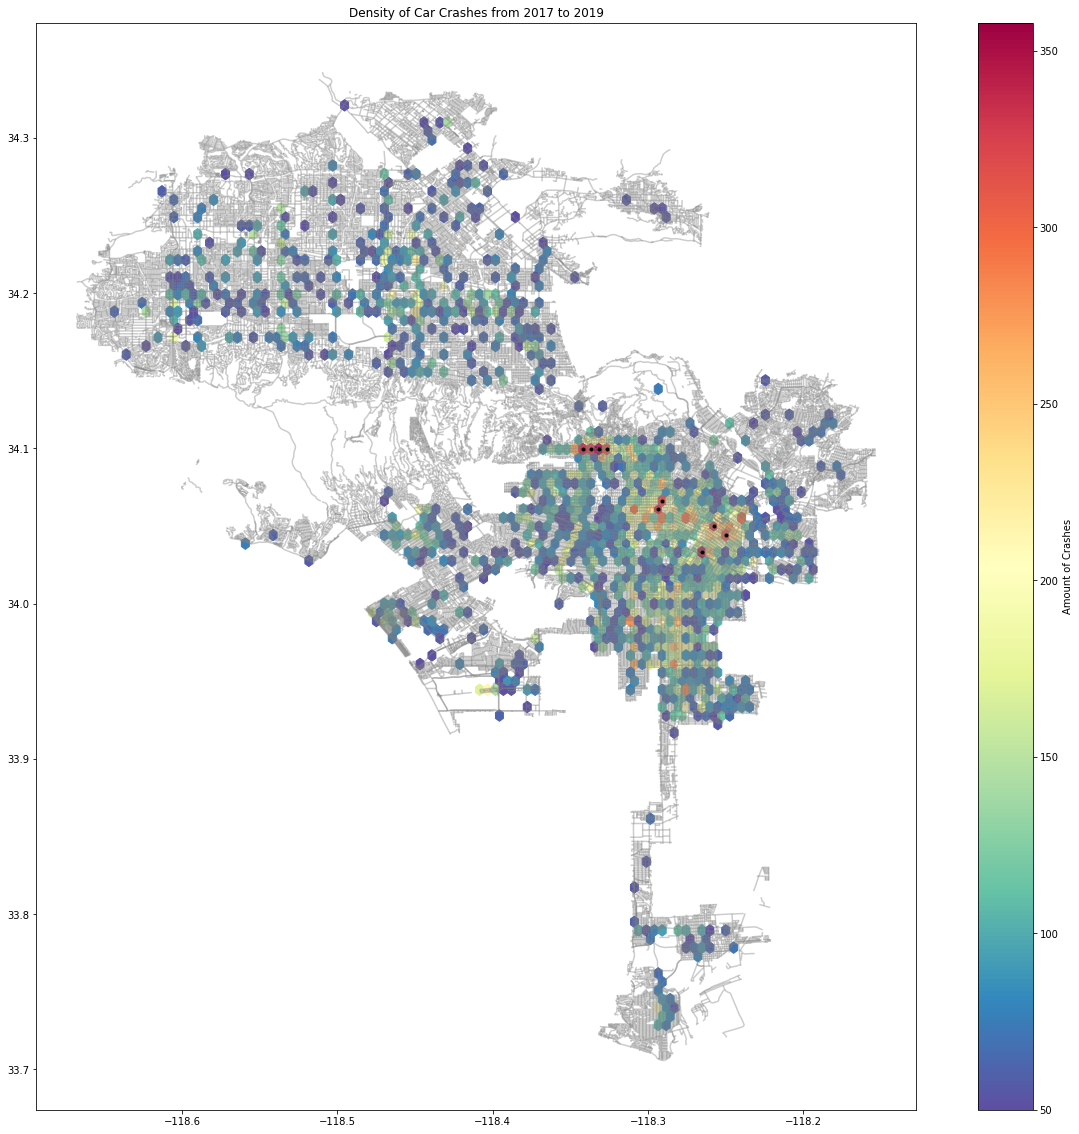

In [150]:
def date_occurred_to_years (date_occurred):
    return int(date_occurred[0:4])

filt_coordinates['Date_Years'] = filt_coordinates['Date_Occurred'].apply(date_occurred_to_years, 'Date_Occurred')

# Crashes from 2017 to 2019
nine_to_five = filt_coordinates[filt_coordinates['Date_Years'] >= 2017]

# Matplotlib hexagonal heatmap of crashes overlaying city map

fig,ax = pt.subplots(figsize = (20,20))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

pt.hexbin(nine_to_five['Longitude'], nine_to_five['Latitude'], C=None, gridsize = 100,mincnt = 50, cmap = pt.cm.Spectral_r)#hexbinning all crashes
cb = pt.colorbar()
image = pt.hexbin(nine_to_five['Longitude'], nine_to_five['Latitude'], C=None, gridsize = 100,mincnt = 300, alpha = 0)#hexbinning most crashes

#Plot dots on high density crash locations( >= 300 crashes)
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        pt.plot(binx,biny,'k.',zorder=100)
        print("High frequency location: " + str(biny) + ", " +str(binx))#print locations of high density

pt.axis('image')#necessary for correct aspect ratio
pt.title('Density of Car Crashes from 2017 to 2019')
cb.set_label('Amount of Crashes')
pt.show()   